# The Ricardian Trade Model

## The Model

#### Production Technologies

The economy produces tow goods $X$ and $Y$. Labor is the only input into production and there are a total of $\bar L$ workers. Production in the $X$ sector takes place using a linear constant returns to scaleproduction technology. If $L_X$ workers are employed in the sector total output will be:

$$Q_X = MPL_X \cdot L_X$$

$MPL_X$ is the constant **marginal product of labor** in the $X$ sector measured in *units of good $X$ per unit labor*.

Production in the $Y$ sector takes place using a linear constant returns to scale production technology. If $L_Y$ workers are employed in the sector total output will be:

$$Q_Y = MPL_Y \cdot L_Y$$

$MPL_Y$ is the constant marginal product of labor in the $Y$ sector measured in *units of good $Y$ per unit labor*.

#### Labor resource constraint

Total labor employed in the two sectors cannot exceed total available labor in the economy:

$$L_X + L_Y = \bar L$$

#### Equilibrium domestic relative prices

We can turn around the first two equations to get labor input requirements as a function of outputs:
    
$$L_X = \frac{1}{MPL_X} Q_X$$
$$L_Y = \frac{1}{MPL_Y} Q_Y$$

Here  $a_{Li} = \frac{1}{MPL_i}$ is interpreted as the **unit labor requirement** in sector $i$, measured in *units of labor unit of good $i$*.  

Note that firms in each sector facing a competitive market for labor will hire workers up to the point where the **marginal value product of labor** in sector $i$ is equal to the market wage:

$$P_X \cdot MPL_X = w = P_Y \cdot MPL_Y$$

We can re-arrange these to find expressions for the **marginal cost** of producing one more unit of good $X$ or good $Y$.

$$MC_X = w \cdot \frac{1}{MPL_X} = P_X$$
and
$$MC_Y = w \cdot \frac{1}{MPL_Y} = P_Y$$

Given the linear production function marginal cost is constant and equals average cost at any level of output.

The ratio of these last two gives us an expression for the equilibrium **domestic relative price of good $X$ measured in terms of good $Y$**

$$\frac{P_X}{P_Y}  = \frac{MPL_Y}{MPL_X}$$

An interesting and important property of this Classical Ricardian linear production technology model is thatwe can find this equilibrium relative prices can be solved for independently of the nature of consumer preferences or the size of the labor endowment. These relative prices are determined entirely by the ratio of these two constant marginal products.

## Plots

In [31]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, fixed

Let's set some styles and other parameters for all matplotlib plots:

In [33]:
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

#### Technology and endowmen in sn example economy

Let's start with an example economy

In [34]:
LBAR = 100
MPLX = 1
MPLY = 1

NAMEX = 'Good X'
NAMEY = 'Good Y'

XMAX = LBAR*MPLX*4
YMAX = LBAR*MPLY*4

N = 50  # num of datapoints to plot
QX =  np.linspace(0, XMAX, N)
QY = MPLY*LBAR - (MPLY/MPLX) * QX

In [35]:
def home(mplx, mply, lbar, show = True):   
    qy = mply*lbar - (mply/mplx) * QX
    plt.plot(QX, qy, linewidth=2, label='PPF')
    plt.axis([0,XMAX,0,YMAX])
    plt.xlabel(NAMEX), plt.ylabel(NAMEY)
    plt.text(0.7*XMAX, 0.8*YMAX, r'$\frac{MPL_x}{MPL_y}=$'
             + '{:5.2f}'.format(mplx/mply), fontsize=20)
    if show:
        plt.show();

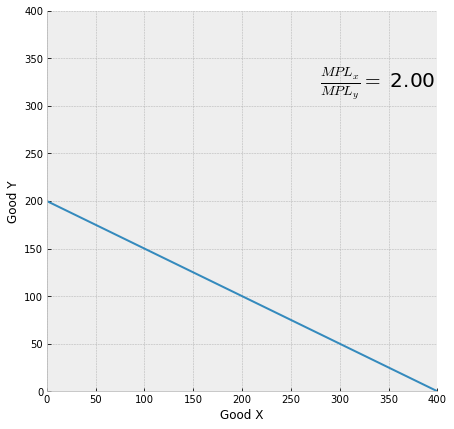

In [36]:
# home(MPLX, MPLY, LBAR)
home(2, 1, 200)

#### Interactive diagram
You will only see this in the notebook if you have run this cell interactively (it will not show up in static renderings).

In [37]:
interact(home, mplx=(0.5,2,0.1), mply=(0.5,2,0.1), lbar=(50, 200, 10),show=fixed(True));

## DRAFT material

In [38]:
def base():   
    plt.axis([0,XMAX,0,YMAX])
    plt.xlabel(NAMEX), plt.ylabel(NAMEY);

In [39]:
def foreign():
    base()
    qy = MPLY*LBAR - (MPLY/MPLX) * QX
    plt.plot(QX, qy, linewidth=2, label='PPF');

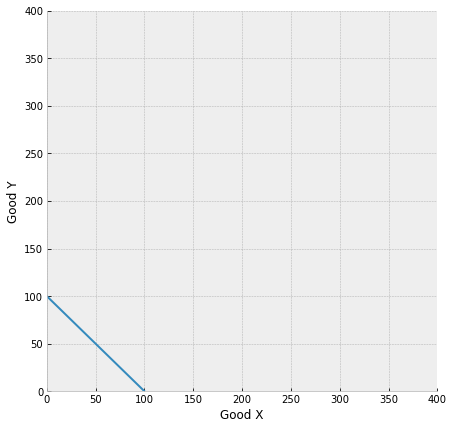

In [19]:
foreign()

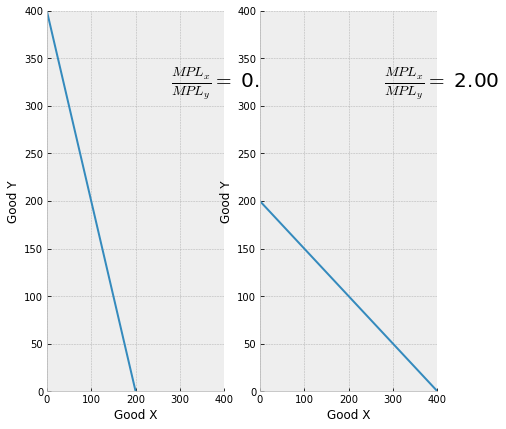

In [44]:
plt.figure(1)
ax = plt.gca().set_aspect('equal')
plt.subplot(121)
home(1, 2, 200, show = False)
plt.subplot(122)
home(2, 1, 200)

In [ ]:
plt.gca(aspect='equal')